# Reading SAGE galaxy files. 

Data taken from: https://www.cosmosim.org/data/catalogs/NewMD_3840_Planck1/SAGE/

Functions used from Github page: http://popia.ft.uam.es/public/read_SAGE.py

## Check marks. 
* Reading the SAGE catalogs. 
* Finding the number of galaxies for each halo with Mvir > 5e13
* Matching onto halos. 
* Plotting richness-mass relation
* Plotting the correlation between lensing profiles -- number count. 

## Setup

In [1]:
## Use the setup.py file to output directories. 
import sys
sys.path.append('/global/homes/z/zzhang13/BaryonPasting/CorrelatedStructures/multiDark/')

from setup import *
toolsdir = tools_dir()
repodir = repo_dir()
chainsdir = chains_dir()
datadir = data_dir()
plotdir = plots_dir()

sys.path.append(toolsdir)
sys.path.append(repodir)

In [2]:
from pygadgetreader import *

In [3]:
from timeit import default_timer as timer

In [4]:
import sage_read_plot_routines as pr 

In [5]:
datadir = '/global/homes/z/zzhang13/BaryonPasting/CorrelatedStructures/multiDark/data/'

In [39]:
gal_file_dict = {}

#gal_z1p03_dir = '/global/cscratch1/sd/zzhang13/MultiDark/MDPL2_galaxies/SAGE/z1p03/'
#gal_z0p49_dir = '/global/cscratch1/sd/zzhang13/MultiDark/MDPL2_galaxies/SAGE/z0p49/'
gal_z0p00_dir = '/pscratch/sd/z/zzhang13/MDPL2/SAGE/z0p00/'


gal_dirs = [gal_z0p00_dir]
gal_file_prefix = [gal_z0p00_dir+'model_z0.000']

#gal_dirs = [gal_z0p00_dir, gal_z0p49_dir, gal_z1p03_dir]
#gal_file_prefix = [gal_z0p00_dir+'model_z0.000', gal_z0p49_dir+'model_z0.490', gal_z1p03_dir+'model_z1.032'] ##Sort in ascending order

In [40]:
cluster_df = pd.read_csv(datadir + 'clusters_m200c_lgt_3e13_mah_allz.csv')
cluster_df.columns

Index(['scale', 'id', 'pid', 'mvir', 'rvir', 'rs', 'x', 'y', 'z', 'Mmvir_all',
       'M200b', 'M200c', 'M500c', 'T/|U|', 'Halfmass_Scale', 'Acc_Rate_Inst',
       'Acc_Rate_100Myr', 'Acc_Rate_1*Tdyn', 'Acc_Rate_2*Tdyn',
       'Acc_Rate_Mpeak', 'c_vir', 'R200c', 'R500c', 'redshift'],
      dtype='object')

In [41]:
cluster_df = cluster_df.rename(columns={"id": "CtreesHaloID"})

In [42]:
with open(datadir + 'MDPL2_DS_R200c_SAGE_Ngal_allM_allz.p', 'rb') as handle:
    matched_halo_df = pickle.load(handle)
matched_halo_df.columns

Index(['id', 'Xoff', 'scale', 'CtreesHaloID', 'pid', 'mvir', 'rvir', 'rs', 'x',
       'y', 'z', 'Mmvir_all', 'M200b', 'M200c', 'M500c', 'T/|U|',
       'Halfmass_Scale', 'Acc_Rate_Inst', 'Acc_Rate_100Myr', 'Acc_Rate_1*Tdyn',
       'Acc_Rate_2*Tdyn', 'Acc_Rate_Mpeak', 'c_vir', 'R200c', 'R500c',
       'redshift', 'Ngal_Dsep_1', 'Ngal_Rvir', 'Ngal_R200c', 'Ngal_R500c',
       'sigma', 'r_range', 'delta_sigma'],
      dtype='object')

In [43]:
redshift_vals = pd.unique(cluster_df['redshift'].values.ravel('K'))

In [44]:
filt = cluster_df['redshift'] == redshift_vals[2]
cluster_df_snapshot = cluster_df[filt]

In [45]:
cluster_df_snapshot

,scale,CtreesHaloID,pid,mvir,rvir,rs,x,y,z,Mmvir_all,...,Halfmass_Scale,Acc_Rate_Inst,Acc_Rate_100Myr,Acc_Rate_1*Tdyn,Acc_Rate_2*Tdyn,Acc_Rate_Mpeak,c_vir,R200c,R500c,redshift
176519,0.4922,7480679306,-1,2.882000e+14,1.589118,286.322998,775.65137,70.00431,624.70386,2.882000e+14,...,0.3530,20140.0,20140.0,12660.0,57790.0,49650.0,5.550089,0.688343,0.405885,1.031694
176520,0.4922,7480679630,-1,1.957600e+14,1.396891,438.428986,774.06635,72.02608,621.05902,1.957600e+14,...,0.3453,44520.0,44520.0,35350.0,39710.0,39160.0,3.186128,0.602995,0.349650,1.031694
176521,0.4922,7480680071,-1,5.253600e+13,0.901037,204.459000,774.02454,70.48774,622.57806,5.962900e+13,...,0.3091,-9236.0,-9236.0,2657.0,10630.0,9104.0,4.406932,0.383849,0.209126,1.031694
176522,0.4922,7480720476,-1,1.081100e+14,1.146072,282.298004,794.99408,94.06732,674.30176,1.081200e+14,...,0.4032,45950.0,45950.0,48040.0,36050.0,38550.0,4.059795,0.491912,0.277566,1.031694
176523,0.4922,7480720691,-1,3.356900e+13,0.776076,172.278000,796.64618,92.04386,677.38428,3.356900e+13,...,0.3231,7159.0,7159.0,5281.0,4027.0,3502.0,4.504789,0.328989,0.175268,1.031694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209293,0.4922,7449377959,-1,3.811400e+13,0.809628,133.949005,480.91885,941.27173,400.18594,3.811400e+13,...,0.3690,-2678.0,-2678.0,-1127.0,8173.0,6642.0,6.044300,0.343699,0.184276,1.031694
209294,0.4922,7449378344,-1,4.392300e+13,0.848833,152.729996,479.80551,943.86493,370.01025,4.399300e+13,...,0.4123,11320.0,11320.0,21360.0,19450.0,20470.0,5.557736,0.360905,0.194880,1.031694
209295,0.4922,7448759317,-1,4.120500e+13,0.830945,254.210999,477.39102,937.20746,371.69727,4.124700e+13,...,0.4215,14680.0,14680.0,17360.0,17720.0,19030.0,3.268722,0.353054,0.190032,1.031694
209296,0.4922,7448711111,-1,3.450100e+13,0.783191,169.520004,491.51678,903.84302,320.23111,3.451200e+13,...,0.3609,6558.0,6558.0,8385.0,6627.0,6354.0,4.620050,0.332108,0.177173,1.031694


## Reading SAGE galaxy files. 

### Calling the functions to read the files. 

Columns needed are:
* Type
* GalaxyIndex
* CentralGalaxyIndex
* SAGEHaloIndex
* SimulationHaloIndex
* Pos
* CentralMvir

In [46]:
from pylab import *
from scipy import signal as ss

#Not sure if float should be 32 or 64

def galdtype():
    Galdesc_full = [
                    ('SnapNum'                      , np.int32),
                    ('Type'                         , np.int32),
                    ('GalaxyIndex'                  , np.int64),
                    ('CentralGalaxyIndex'           , np.int64),
                    ('CtreesHaloID'                 , np.int64),
                    ('TreeIndex'                    , np.int32),
                    ('CtreesCentralID'              , np.int64),
                    ('mergeType'                    , np.int32),
                    ('mergeIntoID'                  , np.int32),
                    ('mergeIntoSnapNum'             , np.int32),
                    ('dT'                           , np.float32),
                    ('Pos'                          , (np.float32, 3)),
                    ('Vel'                          , (np.float32, 3)),
                    ('Spin'                         , (np.float32, 3)),
                    ('Len'                          , np.int32),
                    ('Mvir'                         , np.float32),
                    ('CentralMvir'                  , np.float32),
                    ('Rvir'                         , np.float32),
                    ('Vvir'                         , np.float32),
                    ('Vmax'                         , np.float32),
                    ('VelDisp'                      , np.float32),
                    ('ColdGas'                      , np.float32),
                    ('StellarMass'                  , np.float32),
                    ('BulgeMass'                    , np.float32),
                    ('HotGas'                       , np.float32),
                    ('EjectedMass'                  , np.float32),
                    ('BlackHoleMass'                , np.float32),
                    ('IntraClusterStars'            , np.float32),
                    ('MetalsColdGas'                , np.float32),
                    ('MetalsStellarMass'            , np.float32),
                    ('MetalsBulgeMass'              , np.float32),
                    ('MetalsHotGas'                 , np.float32),
                    ('MetalsEjectedMass'            , np.float32),
                    ('MetalsIntraClusterStars'      , np.float32),
                    ('SfrDisk'                      , np.float32),
                    ('SfrBulge'                     , np.float32),
                    ('SfrDiskZ'                     , np.float32),
                    ('SfrBulgeZ'                    , np.float32),
                    ('DiskRadius'                   , np.float32),
                    ('Cooling'                      , np.float32),
                    ('Heating'                      , np.float32),
                    ('QuasarModeBHaccretionMass'    , np.float32),
                    ('TimeOfLastMajorMerger'        , np.float32),
                    ('TimeOfLastMinorMerger'        , np.float32),
                    ('OutflowRate'                  , np.float32),
                    ('MeanStarAge'                  , np.float32),
                    ('infallMvir'                   , np.float32),
                    ('infallVvir'                   , np.float32),
                    ('infallVmax'                   , np.float32)
                    ]
    names   = [Galdesc_full[i][0] for i in range(len(Galdesc_full))]
    formats = [Galdesc_full[i][1] for i in range(len(Galdesc_full))]
    Galdesc = np.dtype({'names':names, 'formats':formats}, align=True)
    return Galdesc
    


def sageoutsingle(fname):
	# Read a single SAGE output file, intended only as a subroutine of read_sagesnap
	Galdesc_full = galdtype()
	fin = open(fname, 'rb')  # Open the file
	Ntrees = np.fromfile(fin,np.dtype(np.int32),1)  # Read number of trees in file
	NtotGals = int(np.fromfile(fin,np.dtype(np.int32),1)[0])  # Read number of gals in file.
	GalsPerTree = np.fromfile(fin, np.dtype((np.int32, Ntrees)),1) # Read the number of gals in each tree
	G = np.fromfile(fin, Galdesc_full, NtotGals) # Read all the galaxy data
	return G, NtotGals

##For Mvir > 5e13
'''
Modified read_sagesnap function with mvircut for the central halo. 
mvir in units of 1e10 Msun/h, so 5e3 cut corresponds to 5e13 solar masses.
'''
def read_sagesnap_mvircut(fpre, Galdesc, mvircut = 5e3, firstfile=0, lastfile=7):
    # Read full SAGE snapshot, going through each file and compiling into 1 array
    #Galdesc = galdtype()
    
    columns = [Galdesc[i][0] for i in range(len(Galdesc))]
    Glist = []
    Ngal = np.array([])
    for i in range(firstfile,lastfile+1):
        G1, N1 = sageoutsingle(fpre+'_'+str(i))
        G_filt = G1['CentralMvir'] > mvircut ##Applied a Mvir cut to this 
        G1 = G1[G_filt]
        N1 = len(G1)
        G1 = G1[columns]
        Glist += [G1]
        Ngal = np.append(Ngal,N1)

    G = np.empty(int(sum(Ngal)), dtype=Galdesc)
    for i in range(firstfile,lastfile+1):
        j = i-firstfile
        G[int(sum(Ngal[:j])):int(sum(Ngal[:j+1]))] = Glist[j][0:int(Ngal[j])].copy()
        
    
    G = G.view(np.recarray)
    return G


In [32]:
## Testing reading one galaxy file. 
gal_file = gal_z0p00_dir+'model_z0.000_0'
a, N_tot = sageoutsingle(gal_file)

In [47]:
Galdesc = [
        ('Type'                         , np.int32),
        ('GalaxyIndex'                  , np.int64),
        ('CentralGalaxyIndex'           , np.int64),
        ('CtreesHaloID'                 , np.int64),
        ('CtreesCentralID'              , np.int64),
        ('Pos'                          , (np.float32, 3)),
        ('CentralMvir'                  , np.float32),
        ('StellarMass'                  , np.float32),
        ]

columns = [Galdesc[i][0] for i in range(len(Galdesc))]

In [48]:
## Cannot read the Pos array. Break down into coordinates

Galdesc_df = [
        ('Type'                         , np.int32),
        ('GalaxyIndex'                  , np.int64),
        ('CentralGalaxyIndex'           , np.int64),
        ('CtreesHaloID'                 , np.int64),
        ('CtreesCentralID'              , np.int64),
        #('Pos'                          , (np.float32, 3)),
        ('CentralMvir'                  , np.float32),
        ('StellarMass'                  , np.float32),
        ]

columns_df = [Galdesc_df[i][0] for i in range(len(Galdesc_df))]

In [49]:
sage_df = pd.DataFrame(columns=columns_df)   

for i, gal_prefix in enumerate(gal_file_prefix):
    print(gal_prefix)
    filt = cluster_df['redshift'] == redshift_vals[i]
    cluster_df_snapshot = cluster_df[filt]
    
    G = read_sagesnap_mvircut(gal_prefix, Galdesc, mvircut = 3e3, firstfile=0, lastfile=999)
    
    ### Change the datatype of the dataframe so that positions are included.
    sage_df_cur = pd.DataFrame(columns=columns_df)   
    sage_df_cur['Type'] = G['Type']
    sage_df_cur['GalaxyIndex' ] = G['GalaxyIndex' ]
    sage_df_cur['CentralGalaxyIndex'] = G['CentralGalaxyIndex']
    sage_df_cur['CtreesHaloID'] = G['CtreesHaloID']
    sage_df_cur['CtreesCentralID'] = G['CtreesCentralID']
    sage_df_cur['CentralMvir'] = G['CentralMvir']
    sage_df_cur['StellarMass'] = G['StellarMass']
    sage_df_cur['x'] = G['Pos'][:,0] ##Manually add position vector
    sage_df_cur['y'] = G['Pos'][:,1]
    sage_df_cur['z'] = G['Pos'][:,2]
    
    ##Unit conversion. Stellar and virial mass are in units of 1e10 Msun/h
    sage_df_cur['CentralMvir'] = sage_df_cur['CentralMvir']*1e10
    sage_df_cur['StellarMass'] = sage_df_cur['StellarMass']*1e10
    
    
    #Find Central Galaxies
    central_gal = sage_df_cur[(sage_df_cur.GalaxyIndex == sage_df_cur.CentralGalaxyIndex) & (sage_df_cur.Type == 0)]
    central_gal = pd.merge(cluster_df_snapshot[['CtreesHaloID','rvir','R200c','R500c','redshift']], central_gal[['CentralGalaxyIndex','CtreesHaloID']], how="inner", on='CtreesHaloID')
    sage_df_cur = pd.merge(sage_df_cur, central_gal[['rvir','R200c','R500c','redshift','CentralGalaxyIndex']], how="inner", on='CentralGalaxyIndex')
    
    #Append the redshifts
    sage_df = sage_df.append(sage_df_cur)

/pscratch/sd/z/zzhang13/MDPL2/SAGE/z0p00/model_z0.000


In [50]:
cluster_df.columns

Index(['scale', 'CtreesHaloID', 'pid', 'mvir', 'rvir', 'rs', 'x', 'y', 'z',
       'Mmvir_all', 'M200b', 'M200c', 'M500c', 'T/|U|', 'Halfmass_Scale',
       'Acc_Rate_Inst', 'Acc_Rate_100Myr', 'Acc_Rate_1*Tdyn',
       'Acc_Rate_2*Tdyn', 'Acc_Rate_Mpeak', 'c_vir', 'R200c', 'R500c',
       'redshift'],
      dtype='object')

In [51]:
cluster_df.head(5)

,scale,CtreesHaloID,pid,mvir,rvir,rs,x,y,z,Mmvir_all,...,Halfmass_Scale,Acc_Rate_Inst,Acc_Rate_100Myr,Acc_Rate_1*Tdyn,Acc_Rate_2*Tdyn,Acc_Rate_Mpeak,c_vir,R200c,R500c,redshift
0,1.0,12572818342,-1,6.774900e+14,1.787090,623.155029,11.56968,451.91925,69.63885,6.774900e+14,...,0.6565,9281.0,9281.0,51030.0,68480.0,75620.0,2.867810,1.246387,0.724155,0.0
1,1.0,12572804988,-1,5.136200e+14,1.629517,453.993011,57.94242,476.56845,33.24828,5.138100e+14,...,0.8192,353000.0,353000.0,111100.0,72560.0,51630.0,3.589300,1.128265,0.647019,0.0
2,1.0,12572769320,-1,4.842100e+14,1.597800,257.792999,8.70924,458.99570,32.80032,4.842100e+14,...,0.5378,32690.0,32690.0,20040.0,26390.0,36090.0,6.197996,1.104549,0.631622,0.0
3,1.0,12572818483,-1,4.784600e+14,1.591456,423.527008,9.78779,449.06747,72.37156,4.797300e+14,...,0.7498,73750.0,73750.0,78090.0,66270.0,68970.0,3.757626,1.099803,0.628545,0.0
4,1.0,12582689412,-1,4.452000e+14,1.553688,265.845001,80.92496,495.86057,37.93617,4.452000e+14,...,0.6142,21740.0,21740.0,41440.0,30970.0,35730.0,5.844338,1.071597,0.610283,0.0


(array([      0.,       0.,       0.,       0.,       0., 8153603.,
              0.,       0.,       0.,       0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

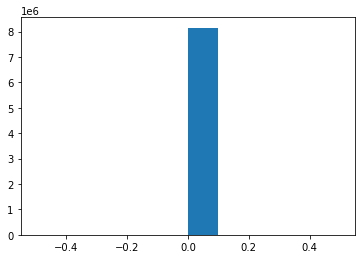

In [52]:
plt.hist(sage_df['redshift'])

### Apply a stellar mass cut

Mean stellar mass:  10115070000.290081 23988968355.168068


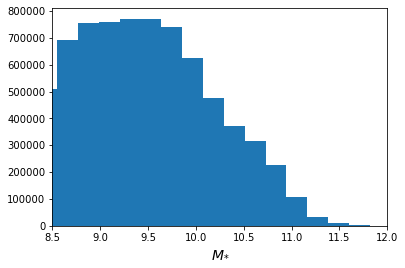

In [65]:
#sage_df['StellarMass'].plot(kind='hist', logy=True, logx=True, alpha=0.3)
M_star = sage_df['StellarMass']
M_star = M_star[M_star!=0]
plt.hist(np.log10(M_star), bins=50)
#plt.xscale('log')
plt.xlim([8.5,12])
#plt.axvline(sage_df['StellarMass'].mean(), c='orange')
plt.xlabel(r'$M_{*}$', fontsize=14)
print("Mean stellar mass: ", sage_df['StellarMass'].mean(), sage_df['StellarMass'].std()) 

In [23]:
#sage_df = sage_df[sage_df['StellarMass'] > 5e10]

Mean stellar mass:  9919579874.989458 23630084343.232327


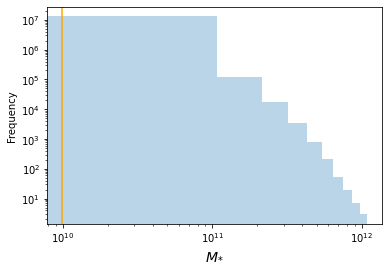

In [24]:
sage_df['StellarMass'].plot(kind='hist', logy=True, logx=True, alpha=0.3)
plt.axvline(sage_df['StellarMass'].mean(), c='orange')
plt.xlabel(r'$M_{*}$', fontsize=14)
print("Mean stellar mass: ", sage_df['StellarMass'].mean(), sage_df['StellarMass'].std()) 

### Consider the possibility if there are clusters at different redshifts that have the same ID.

In [25]:
boolean = sage_df.duplicated(subset=['CentralGalaxyIndex']).any() # True
print(boolean)

sage_df.duplicated(subset=['CentralGalaxyIndex'])

True


0          False
1           True
2           True
3           True
4           True
           ...  
1537763     True
1537764     True
1537765     True
1537766     True
1537767     True
Length: 13181436, dtype: bool

### Diagnostic Plots

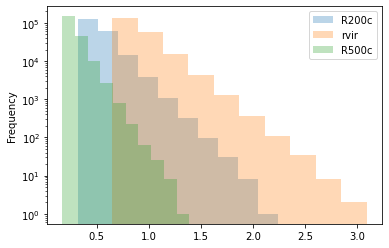

In [26]:
cluster_df['R200c'].plot(kind='hist', logy=True, alpha=0.3, label='R200c')
cluster_df['rvir'].plot(kind='hist', logy=True, alpha=0.3, label = 'rvir')
cluster_df['R500c'].plot(kind='hist', logy=True, alpha=0.3, label='R500c')
plt.legend()



In [27]:
radius_cut = 1 #Mpc/h
for redshift_cur in iter(redshift_vals):
    filt = sage_df['redshift'] == redshift_cur
    sage_df_snapshot = sage_df[filt]
    by_central = sage_df_snapshot.groupby('CentralGalaxyIndex')
    central_gal = sage_df_snapshot[(sage_df_snapshot.GalaxyIndex == sage_df_snapshot.CentralGalaxyIndex) & (sage_df_snapshot.Type == 0)]
    
    test = pd.merge(cluster_df, central_gal, how="inner", on='CtreesHaloID')
    print(len(test))

97033
71944
32779


209298


In [39]:
print(97033+71944+32779)

201756


## Define different galaxy definitions 

* Constant radius < 1 MPc
* Rvir
* R200c
* R500c

CentralGalaxyIndex may have the same number in different redshift slices so need to sort by redshift. 

### Constant radius 

In [ ]:
radius_cut = 1 #Mpc/h
cluster_df_append = pd.DataFrame()
for redshift_cur in iter(redshift_vals):
    filt = sage_df['redshift'] == redshift_cur
    sage_df_snapshot = sage_df[filt]
    by_central = sage_df_snapshot.groupby('CentralGalaxyIndex')
    central_gal = sage_df_snapshot[(sage_df_snapshot.GalaxyIndex == sage_df_snapshot.CentralGalaxyIndex) & (sage_df_snapshot.Type == 0)]

    i=0
    Ngal_arr = np.zeros(len(central_gal))
    for central_index, frame in tqdm(by_central): 
        orig_num = len(frame['x'])
        central_x = float(frame.iloc[0]['x']); central_y = float(frame.iloc[0]['y']); central_z = float(frame.iloc[0]['z'])
       
        filt = (np.array(frame['x'])-central_x)**2 + (np.array(frame['y'])-central_y)**2 + (np.array(frame['z'])-central_z)**2 < radius_cut**2
        Ngal_arr[i] = sum(filt)
        i+=1
        
    ## Find number of galaxies within the criterion
    central_gal['Ngal_Dsep_1'] = Ngal_arr
    print(len(central_gal))
    cluster_df_append = cluster_df_append.append(central_gal)
    
cluster_df = pd.merge(cluster_df, cluster_df_append[['CtreesHaloID','Ngal_Dsep_1']], how="inner", on='CtreesHaloID')

### Virial radius

In [38]:
cluster_df_append = pd.DataFrame()
for redshift_cur in iter(redshift_vals):
    filt = sage_df['redshift'] == redshift_cur
    sage_df_snapshot = sage_df[filt]
    by_central = sage_df_snapshot.groupby('CentralGalaxyIndex')
    central_gal = sage_df_snapshot[(sage_df_snapshot.GalaxyIndex == sage_df_snapshot.CentralGalaxyIndex) & (sage_df_snapshot.Type == 0)]
    
    i=0
    Ngal_arr = np.zeros(len(central_gal))
    for central_index, frame in tqdm(by_central):
        radius_cut = frame.iloc[0]['rvir']
        orig_num = len(frame['x'])
        central_x = float(frame.iloc[0]['x']); central_y = float(frame.iloc[0]['y']); central_z = float(frame.iloc[0]['z'])
       
        filt = (np.array(frame['x'])-central_x)**2 + (np.array(frame['y'])-central_y)**2 + (np.array(frame['z'])-central_z)**2 < radius_cut**2
        Ngal_arr[i] = sum(filt)
        i+=1
        
    ## Find number of galaxies within the criterion
    central_gal['Ngal_Rvir'] = Ngal_arr
    cluster_df_append = cluster_df_append.append(central_gal)
    
cluster_df = pd.merge(cluster_df, cluster_df_append[['CtreesHaloID','Ngal_Rvir']], how="inner", on='CtreesHaloID')

100%|██████████| 97033/97033 [01:55<00:00, 841.90it/s]
/global/homes/z/zzhang13/.conda/envs/myLSST/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
100%|██████████| 32779/32779 [00:38<00:00, 841.62it/s]


In [41]:
print(len(cluster_df))
print(len(cluster_df_append))

201756
0


### R200c

In [42]:
cluster_df_append = pd.DataFrame()
for redshift_cur in iter(redshift_vals):
    filt = sage_df['redshift'] == redshift_cur
    sage_df_snapshot = sage_df[filt]
    by_central = sage_df_snapshot.groupby('CentralGalaxyIndex')
    central_gal = sage_df_snapshot[(sage_df_snapshot.GalaxyIndex == sage_df_snapshot.CentralGalaxyIndex) & (sage_df_snapshot.Type == 0)]
    
    sage_df_radius = pd.DataFrame(columns=sage_df.columns)
    
    i=0
    Ngal_arr = np.zeros(len(central_gal))
    for central_index, frame in tqdm(by_central):
        radius_cut = frame.iloc[0]['R200c']
        orig_num = len(frame['x'])
        central_x = float(frame.iloc[0]['x']); central_y = float(frame.iloc[0]['y']); central_z = float(frame.iloc[0]['z'])
       
        filt = (np.array(frame['x'])-central_x)**2 + (np.array(frame['y'])-central_y)**2 + (np.array(frame['z'])-central_z)**2 < radius_cut**2
        Ngal_arr[i] = sum(filt)
        i+=1
        
    ## Find number of galaxies within the criterion
    central_gal['Ngal_R200c'] = Ngal_arr
    cluster_df_append = cluster_df_append.append(central_gal)
    
cluster_df = pd.merge(cluster_df, cluster_df_append[['CtreesHaloID','Ngal_R200c']], how="inner", on='CtreesHaloID')

100%|██████████| 97033/97033 [01:51<00:00, 870.99it/s]
/global/homes/z/zzhang13/.conda/envs/myLSST/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
100%|██████████| 32779/32779 [00:38<00:00, 856.97it/s]


In [43]:
print(len(cluster_df))
print(len(cluster_df_append))

201756
201756


### R500c

In [44]:
cluster_df_append = pd.DataFrame()
for redshift_cur in iter(redshift_vals):
    filt = sage_df['redshift'] == redshift_cur
    sage_df_snapshot = sage_df[filt]
    by_central = sage_df_snapshot.groupby('CentralGalaxyIndex')
    central_gal = sage_df_snapshot[(sage_df_snapshot.GalaxyIndex == sage_df_snapshot.CentralGalaxyIndex) & (sage_df_snapshot.Type == 0)]
    
    sage_df_radius = pd.DataFrame(columns=sage_df.columns)
    
    i=0
    Ngal_arr = np.zeros(len(central_gal))
    for central_index, frame in tqdm(by_central):
        radius_cut = frame.iloc[0]['R500c']
        orig_num = len(frame['x'])
        central_x = float(frame.iloc[0]['x']); central_y = float(frame.iloc[0]['y']); central_z = float(frame.iloc[0]['z'])
       
        filt = (np.array(frame['x'])-central_x)**2 + (np.array(frame['y'])-central_y)**2 + (np.array(frame['z'])-central_z)**2 < radius_cut**2
        Ngal_arr[i] = sum(filt)
        i+=1
        
    ## Find number of galaxies within the criterion
    central_gal['Ngal_R500c'] = Ngal_arr
    cluster_df_append = cluster_df_append.append(central_gal)
    
cluster_df = pd.merge(cluster_df, cluster_df_append[['CtreesHaloID','Ngal_R500c']], how="inner", on='CtreesHaloID')

100%|██████████| 97033/97033 [01:54<00:00, 846.23it/s]
/global/homes/z/zzhang13/.conda/envs/myLSST/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
100%|██████████| 32779/32779 [00:38<00:00, 854.83it/s]


In [45]:
print(len(cluster_df))
print(len(cluster_df_append))

201756
201756


### Diagnostic Plots

In [49]:
cluster_df

,scale,CtreesHaloID,pid,mvir,rvir,rs,x,y,z,Mmvir_all,...,Acc_Rate_2*Tdyn,Acc_Rate_Mpeak,c_vir,R200c,R500c,redshift,Ngal_Dsep_1,Ngal_Rvir,Ngal_R200c,Ngal_R500c
0,1.0000,12572818342,-1,6.774900e+14,1.787090,623.155029,11.56968,451.91925,69.63885,6.774900e+14,...,68480.0,75620.0,0.002868,1.246387,0.724155,0.000000,81.0,280.0,143.0,25.0
1,1.0000,12572804988,-1,5.136200e+14,1.629517,453.993011,57.94242,476.56845,33.24828,5.138100e+14,...,72560.0,51630.0,0.003589,1.128265,0.647019,0.000000,106.0,308.0,139.0,47.0
2,1.0000,12572769320,-1,4.842100e+14,1.597800,257.792999,8.70924,458.99570,32.80032,4.842100e+14,...,26390.0,36090.0,0.006198,1.104549,0.631622,0.000000,111.0,233.0,135.0,36.0
3,1.0000,12582689412,-1,4.452000e+14,1.553688,265.845001,80.92496,495.86057,37.93617,4.452000e+14,...,30970.0,35730.0,0.005844,1.071597,0.610283,0.000000,105.0,217.0,126.0,38.0
4,1.0000,12572805373,-1,4.416300e+14,1.549522,476.278015,14.65232,444.75800,98.21551,4.421600e+14,...,64940.0,54550.0,0.003253,1.068489,0.608274,0.000000,113.0,243.0,136.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201751,0.4922,7449377959,-1,3.811400e+13,0.809628,133.949005,480.91885,941.27173,400.18594,3.811400e+13,...,8173.0,6642.0,0.006044,0.343699,0.184276,1.031694,30.0,30.0,7.0,3.0
201752,0.4922,7449378344,-1,4.392300e+13,0.848833,152.729996,479.80551,943.86493,370.01025,4.399300e+13,...,19450.0,20470.0,0.005558,0.360905,0.194880,1.031694,35.0,35.0,5.0,1.0
201753,0.4922,7448759317,-1,4.120500e+13,0.830945,254.210999,477.39102,937.20746,371.69727,4.124700e+13,...,17720.0,19030.0,0.003269,0.353054,0.190032,1.031694,35.0,35.0,10.0,3.0
201754,0.4922,7448711111,-1,3.450100e+13,0.783191,169.520004,491.51678,903.84302,320.23111,3.451200e+13,...,6627.0,6354.0,0.004620,0.332108,0.177173,1.031694,31.0,31.0,7.0,2.0


Text(0.5, 0, 'Ngal_Dsep_1')

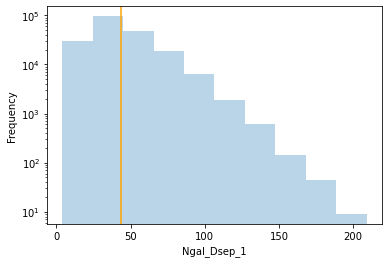

In [50]:
cluster_df['Ngal_Dsep_1'].plot(kind='hist', logy=True, alpha=0.3)
plt.axvline(cluster_df['Ngal_Dsep_1'].mean(), c='orange')
plt.xlabel('Ngal_Dsep_1')
#print("Mean number of galaxies: ", central_gal_df['Ngal'].mean(), central_gal_df['Ngal'].std()) 
#print("Number of central galaxies: ", len(central_gal_df))

Text(0.5, 0, 'Ngal_Rvir')

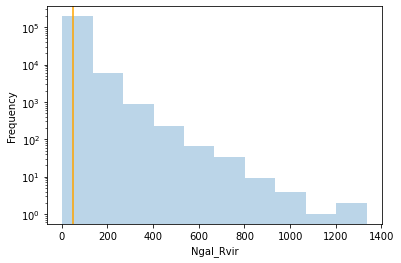

In [51]:
cluster_df['Ngal_Rvir'].plot(kind='hist', logy=True, alpha=0.3)
plt.axvline(cluster_df['Ngal_Rvir'].mean(), c='orange')
plt.xlabel('Ngal_Rvir')
#print("Mean number of galaxies: ", central_gal_df['Ngal'].mean(), central_gal_df['Ngal'].std()) 
#print("Number of central galaxies: ", len(central_gal_df))

Text(0.5, 0, 'Ngal_R200c')

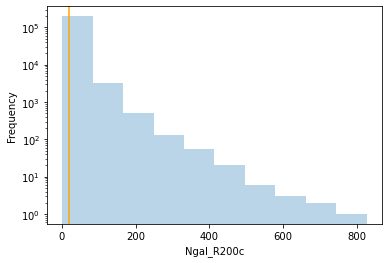

In [52]:
cluster_df['Ngal_R200c'].plot(kind='hist', logy=True, alpha=0.3)
plt.axvline(cluster_df['Ngal_R200c'].mean(), c='orange')
plt.xlabel('Ngal_R200c')
#print("Mean number of galaxies: ", central_gal_df['Ngal'].mean(), central_gal_df['Ngal'].std()) 
#print("Number of central galaxies: ", len(central_gal_df))

Text(0.5, 0, 'Ngal_R500c')

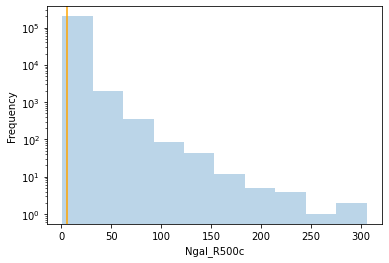

In [53]:
cluster_df['Ngal_R500c'].plot(kind='hist', logy=True, alpha=0.3)
plt.axvline(cluster_df['Ngal_R500c'].mean(), c='orange')
plt.xlabel('Ngal_R500c')
#print("Mean number of galaxies: ", central_gal_df['Ngal'].mean(), central_gal_df['Ngal'].std()) 
#print("Number of central galaxies: ", len(central_gal_df))

<AxesSubplot:ylabel='Frequency'>

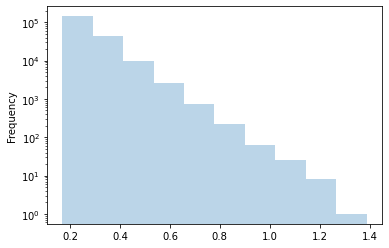

In [54]:
cluster_df['R500c'].plot(kind='hist', logy=True, alpha=0.3)

<AxesSubplot:ylabel='Frequency'>

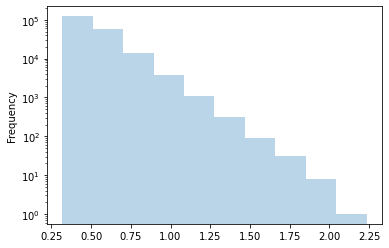

In [55]:
cluster_df['R200c'].plot(kind='hist', logy=True, alpha=0.3)

<AxesSubplot:ylabel='Frequency'>

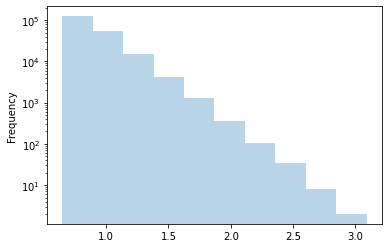

In [56]:
cluster_df['rvir'].plot(kind='hist', logy=True, alpha=0.3)

In [57]:
import GCRCatalogs
try: import clmm
except:
    import notebook_install
    notebook_install.install_clmm_pipeline(upgrade=False)
    import clmm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
gc_truth = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_image' )
cosmo = gc_truth.cosmology

In [58]:
#------------------------------
def M_DES_Y1(l, z, Omega_m_z0):
    """Mass richness parameters from McClintock et al. (2018) [https://arxiv.org/pdf/1805.00039.pdf]"""
    
    M0 = 3.081e14   #(+-0.075 +-0.133)e14
    # log10(M0) = 14.489 #+-0.011 +-0.019
    l0 = 40.
    z0 = 0.35
    F = 1.356   #+-0.051 +-0.008
    G = -0.30   #+-0.30 +-0.06
    return mass_richness_parametrization(l, z,  F, G, Omega_m_z0, M0, l0, z0, mass_def="FoF")

def mass_richness_parametrization(l, z, F, G, Omega_m_z0, M0, l0, z0, mass_def="crit"):
    """Parametrization of the mass-richness-redshift relation used in several DES papers """
    if mass_def == "mean":
        M = M0
    elif mass_def == "crit":
        M = M0 * Omega_m_z0*(1.+z)**3
    elif mass_def == "FoF":
        M = M0 * Omega_m_z0*(1.+z)**3 * 0.92
        
    return M*(l/l0)**F*((1+z)/(1+z0))**G

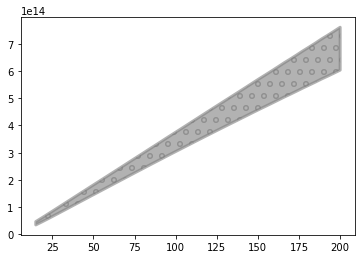

In [8]:
len_lob_gird=50
lobs_grid_DESxSPT=np.linspace(15.,200,len_lob_gird)
means_m_DESxSPT=np.loadtxt('mean_M_lob_SPTRM_36_v1.txt')

# DES NC+SPT-OMR ===================================
from scipy.interpolate import InterpolatedUnivariateSpline as ius # interpolation

log10Mdata_DESxSPT=np.mean(np.log10(means_m_DESxSPT),axis=0)
lo_mass=ius(np.log(lobs_grid_DESxSPT[:]),(log10Mdata_DESxSPT-np.std(np.log10(means_m_DESxSPT),axis=0)),k=1)
hi_mass=ius(np.log(lobs_grid_DESxSPT[:]),(log10Mdata_DESxSPT+np.std(np.log10(means_m_DESxSPT),axis=0)),k=1)

samp_lo=lo_mass(np.log(lobs_grid_DESxSPT))
samp_hi=hi_mass(np.log(lobs_grid_DESxSPT))

plt.fill_between(lobs_grid_DESxSPT, 10.**samp_lo,10.**samp_hi,color='gray',hatch='o',alpha=0.6,lw=3,label='DES-NC+SPT-OMR')

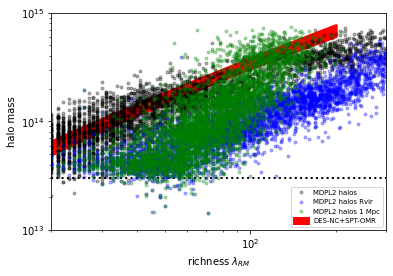

In [26]:

#plt.axvline(20, color='black', linestyle='dotted', lw=2)
plt.axhline(3*10**13, color='black', linestyle='dotted', lw=2)

plt.xlabel("richness $\\lambda_{RM}$")
plt.ylabel('halo mass')


#adding parametrization from litterature
min_richness=20
ll = np.logspace(np.log10(min_richness), np.log10(200))

#z0 = 0.0
#Om_z0 = cosmo.Om0   

#plt.fill_between(ll, M_DES_Y1_lim(ll, z0, 'min', Om_z0),M_DES_Y1_lim(ll, z0, 'max', Om_z0),alpha=0.2,color='r')

#plt.plot(ll, M_DES_Y1(ll, z0, Om_z0), 'r-', alpha=1, label='DES Y1 (M_200c) at z ='+str(z0) )
plt.loglog(matched_halo_df['Ngal_R200c'], matched_halo_df['M500c'], '.', alpha=0.3, color='black', label = 'MDPL2 halos')
plt.loglog(matched_halo_df['Ngal_Rvir'], matched_halo_df['M500c'], '.', alpha=0.3, color='blue', label = 'MDPL2 halos Rvir')
plt.loglog(matched_halo_df['Ngal_Dsep_1'], matched_halo_df['M500c'], '.', alpha=0.3, color='green', label = 'MDPL2 halos 1 Mpc')
plt.fill_between(lobs_grid_DESxSPT, 10.**samp_lo,10.**samp_hi,color='red',hatch='o',alpha=1,lw=3,label='DES-NC+SPT-OMR')

#plt.plot(ll, M_SDSS(ll, z0, Om_z0), 'g-.', alpha=1, label='SDSS (M_200c) at z ='+str(z0))
#plt.plot(ll, M_DES_SV(ll, z0, Om_z0), 'b--', alpha=1, label='DES SV (M_200c) at z ='+str(z0))
plt.xlim([20,300])
plt.ylim([1e13,1e15])
plt.legend(fontsize='x-small')
plt.savefig(plotdir+'MOR_MDPL2_vs_data.pdf')

## Save the file

In [89]:
## Output the most massive halo. 
# Saving the cluster_df as a csv file.
cluster_df.to_csv(datadir + 'clusters_m200c_lgt_3e13_mah_allz_Ngal.csv', index=False)